# 1. Revisiting MLP of Assignment1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.1.2+cpu  Device: cpu


In [3]:
# BATCH_SIZE = 32
# EPOCHS = 10

In [4]:
# train_dataset = datasets.MNIST(root = "../data/MNIST",
#                                train = True,
#                                download = True,
#                                transform = transforms.ToTensor())

# test_dataset = datasets.MNIST(root = "../data/MNIST",
#                               train = False,
#                               transform = transforms.ToTensor())

# train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
#                                            batch_size = BATCH_SIZE,
#                                            shuffle = True)

# test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
#                                           batch_size = BATCH_SIZE,
#                                           shuffle = False)

In [6]:
transform_train = transforms.Compose([ ## Data transformation only for train data
    transforms.Resize(size=(256, 256)), ## Resizing the data into (256, 256)
    transforms.RandomRotation(30), ## 30 degree rotation (data augmentation)
    transforms.ToTensor(), ## To 'Pytorch Tensor' -> Pytorch Deep Learning Models like CNN (we'll deal with it later on) get only tensor as an input
])
transform_val = transforms.Compose([ ## Data transformation only for validation (here, it works like the 'test' data...) data
    transforms.Resize(size=(256, 256)), ## Resizing the data into (256, 256)
    transforms.ToTensor() ## To 'Pytorch Tensor'
])

## Please note that the data augmentation technique is not usually implemented to validation/test dataset
## This is why we split transform_train and transform_val -- transform_val does not need
## transforms.RandomRotation(30), ## 30 degree rotation (data augmentation)

train_data = datasets.ImageFolder(root='/kaggle/input/animal-faces/afhq/train', transform=transform_train)
## Pytorch function datasets.ImageFolder organizes the data in root directory (here, '/content/drive/MyDrive/intro-dl/afhq/train')
## and applies transform_train as defined above.
val_data = datasets.ImageFolder(root='/kaggle/input/animal-faces/afhq/val', transform=transform_val)
## Pytorch function datasets.ImageFolder organizes the data in root directory (here, '/content/drive/MyDrive/intro-dl/afhq/val')
## and applies transform_val as defined above.

train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle = True)
## Pytorch function DataLoader organizes the 'shuffled' (shuffle = True) data in train_data as defined above with the batch size of 16.
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle = True)
## Pytorch function DataLoader organizes the 'shuffled' (shuffle = True) data in val_data as defined above with the batch size of 16.

In [7]:
train_data.class_to_idx ## It automatically catches the classes in train_data -> check it by yourself!

{'cat': 0, 'dog': 1, 'wild': 2}

In [8]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
## brings the next images and labels

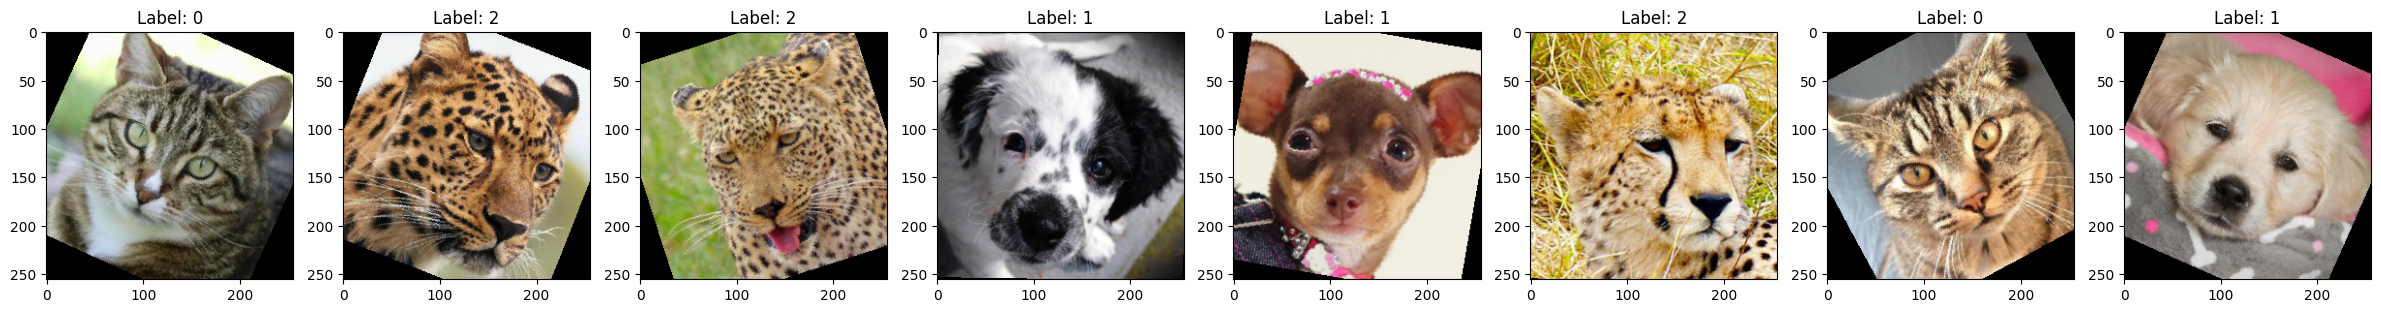

In [9]:
def show_imgs(imgs, labels, preds=None):
    f, axes= plt.subplots(1, 8, figsize=(30,5))
    for i, axis in enumerate(axes):
        axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
        axes[i].set_title(f'Label: {labels[i].numpy()}')
        if preds != None:
            axes[i].set_xlabel(f'Pred: {np.argmax(preds[i].numpy())}')
    plt.show()

show_imgs(images, labels)

## shows the sample train_data
## 30 degree rotation!

In [10]:
import os

In [11]:
train_cat = os.listdir('/kaggle/input/animal-faces/afhq/train/cat')
train_dog = os.listdir('/kaggle/input/animal-faces/afhq/train/dog')
train_wild = os.listdir('/kaggle/input/animal-faces/afhq/train/wild')

In [ ]:
# WARNING: DO NOT RUN THIS CODE. IT TAKES TOO LONG TIME TO GET THE RESULT.

# train_cat_image = []
# train_dog_image = []
# train_wild_image = []

# train_cat_target = []
# train_dog_target = []
# train_wild_target = []

# for i in range(len(train_cat)):
#   image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/cat', train_cat[i]))
#   train_cat_image.append(image)
#   train_cat_target.append(0)

# for i in range(len(train_dog)):
#   image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/dog', train_dog[i]))
#   train_dog_image.append(image)
#   train_dog_target.append(1)

# for i in range(len(train_wild)):
#   image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/wild', train_wild[i]))
#   train_wild_image.append(image)
#   train_wild_target.append(2)

Question 1. Explain os.path.join function.  

os.path.join function is used for joining one or more path components together. This concatenates multiple path components with the seperating character '/' beteween the components except the last component.

# 2. Backpropagation and PyTorch Autograd

In [12]:
import torch
     

w = torch.tensor(3.0, requires_grad = True) ## requires_grad = True: it saves the gradient
     

y = w**3 + 10
     

y.backward() ## backward() calculates the derivative
     

print(f'Differentiating y by w: {w.grad}') ## check it by yourself!! dy/dw = 3*w^2 ..., so

Differentiating y by w: 27.0


In [14]:
## Another example with the loss fuction
import torch
import torch.nn as nn
     

x = torch.ones(5)  # input
y = torch.zeros(3)  # output

w = torch.randn(5, 3, requires_grad=True) # weight
b = torch.randn(3, requires_grad=True) # bias
     

z = torch.matmul(x, w) + b # z = wx + b
loss_fn = nn.MSELoss() # loss function
     

loss = loss_fn(z, y)

loss.backward()
     

print(f'Differentiating loss by w :\n {w.grad}')
print(f'Differentiating loss by b : {b.grad}')

Differentiating loss by w :
 tensor([[-1.6624,  2.8765,  0.3740],
        [-1.6624,  2.8765,  0.3740],
        [-1.6624,  2.8765,  0.3740],
        [-1.6624,  2.8765,  0.3740],
        [-1.6624,  2.8765,  0.3740]])
Differentiating loss by b : tensor([-1.6624,  2.8765,  0.3740])


Question 2. PyTorch Autograd and DataLoader  
신경망(Neural Network)의 학습은 다음의 두가지 방법을 통해 진행된다.

순전파 (Forward Propagation)
함수에서 실행한 입력데이터 값을 통해 정답을 맞추기 위한 최선의 예측을 한다. 계산을 할 때는 input data에서 output까지 순서대로 계산을 진행한다.
역전파 (Backward Propagation)
추측값에서 발생한 error와 이에 대한 gradient를 통해 parameter 값들을 업데이트한다. 주로 경사하강법 (Gradient Descent)을 이용한다. 

신경망 학습 알고리즘

임의의 hyper parameter(w)설정  
input data와 w를 통해 hidden layer의 값 계산  
layer의 값과 w값을 통해 output 계산  
error를 줄이기 위해 hidden layer와 output layer 사이의 w 업데이트  
loss를 줄이기 위해 input layer와 hiddne layer 사이의 w 업데이트  
error가 충분히 작아질 때까지 두번째~다섯번째 단계를 반복  
2, 3 단계 : 순전파 과정  
4, 5 단계 : 역전파 과정  

# 3. Autograd

In [17]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [18]:
BATCH_SIZE = 32

     

INPUT_SIZE = 1000
HIDDEN_SIZE = 100
OUTPUT_SIZE = 2
LEARNING_RATE = 1e-6

In [19]:
x = torch.randn(BATCH_SIZE,
                INPUT_SIZE,
                device = device,
                dtype = torch.float,
                requires_grad = False)


y = torch.randn(BATCH_SIZE,
                OUTPUT_SIZE,
                device = device,
                dtype = torch.float,
                requires_grad = False)


w1 = torch.randn(INPUT_SIZE,
                 HIDDEN_SIZE,
                 device = device,
                 dtype = torch.float,
                 requires_grad = True)


w2 = torch.randn(HIDDEN_SIZE,
                 OUTPUT_SIZE,
                 device = device,
                 dtype = torch.float,
                 requires_grad = True)

In [20]:
from torch import nn


for t in range(1, 501):

    hidden = x.mm(w1)
    hidden = nn.ReLU()(hidden)
    y_pred = hidden.mm(w2)


    loss = (y_pred - y).pow(2).sum()


    if t % 100 == 0:
        print(t, "th Iteration: ", sep = "")
        print(">>>> Loss: ", loss.item())


    loss.backward()


    with torch.no_grad():

        w1 -= LEARNING_RATE * w1.grad
        w2 -= LEARNING_RATE * w2.grad


        w1.grad.zero_()
        w2.grad.zero_()

100th Iteration: 
>>>> Loss:  0.0008819352369755507
200th Iteration: 
>>>> Loss:  6.33661727533763e-07
300th Iteration: 
>>>> Loss:  1.8317008709800575e-07
400th Iteration: 
>>>> Loss:  1.1971661706411396e-07
500th Iteration: 
>>>> Loss:  9.351137464364001e-08


# Computational Graph (연산 그래프)
autograd는 실행된 모든 연산의 기록을 DAC(Directed Acyclic Graph)에 저장하는데 DAG의 전반적인 계산 과정을 그래프로 나타는 것이 연산 그래프이다. 이때, leave 는 input data이고, root는 output data이다.

순전파 단계에서 autograd는 요정된 연산을 수행하여 output data를 계산하고 DAG연산의 gradient function을 유지한다.

역전파 단계에서 autograd는 root에서 .backward()가 호출될 때 시작되는데, 각 .grad_fn으로부터 gradient를 계산하고 각 .grad 속성에 계산 결과를 저장한다. chain rule을 이용하여 모든 leave에 전파한다.

# 4. Vanishing Gradient Problem

In [21]:
import matplotlib.pyplot as plt #시각화를 위해 matplotlib.pyplot import
import numpy as np #arrays와 matrices를 다루기 위해 numpy import
import pandas as pd #데이터 분석을 위해 pandas import
import tensorflow as tf #머신러닝 모델을 학습시키기 위해 tensorflow import
import warnings #예기치 못한 결과가 발생했을 때 알리기 위한 warning import
from matplotlib.colors import ListedColormap #시각화 과정에서 custom 컬러맵을 위해 ListedColormap import
from mlxtend.plotting import plot_decision_regions #다양한 머신러닝 학습을 수행하기 위해 plot_decision_regions import
from pylab import rcParams #디폴트 세팅 저장을 위해 rcParams import
from sklearn.datasets import make_circles, make_moons #분류 문제에 대한 합성 데이터를 만들기 위해 make_circles, make_moons import
from sklearn.model_selection import train_test_split #데이터를 학습 데이터와 테스트 데이터로 나뉘기 위해 train_test_split import
from tensorflow.keras.layers import Dense #fully-connected neural network layer를 위해 Dense import
from tensorflow.keras.models import Sequential #neural network 모델을 위한 linear stack of layer를 만들기 위해 Sequential import

2024-04-17 03:48:18.828351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 03:48:18.828476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 03:48:18.982071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
np.set_printoptions(suppress=True) #부동소수점 숫자를 표현할 때, 지수표기법을 사용하지 않도록 한다.
zero_one_colourmap = ListedColormap(('white', 'red')) #plotting에 사용될 흰색과 빨간색으로 이루어진 컬러맵을 생성한다.
rcParams['figure.figsize'] = 14, 7 #넓이 14인치, 높이 7인치의 기본 사이즈를 설정한다.
rcParams['axes.facecolor'] = '#383838' #축의 기본 색상을 어두운 회색으로 설정한다.(색 번호 : #383838 )

In [23]:
X, y = make_circles(n_samples = 1000, #1000개의 데이터를 동심원 형태로 배열한다.
                    factor=0.85, #외부의 원과 내부 원의 비율을 나타낸다. 이 경우 내부의 원이 외부 원 크기의 85%임을 의미한다.
                    random_state=2021, # seed for the random number generator로 사용되는 parameter를 설정한다.
                    noise=0.1) # data에 추가되는 noise를 설정한다.

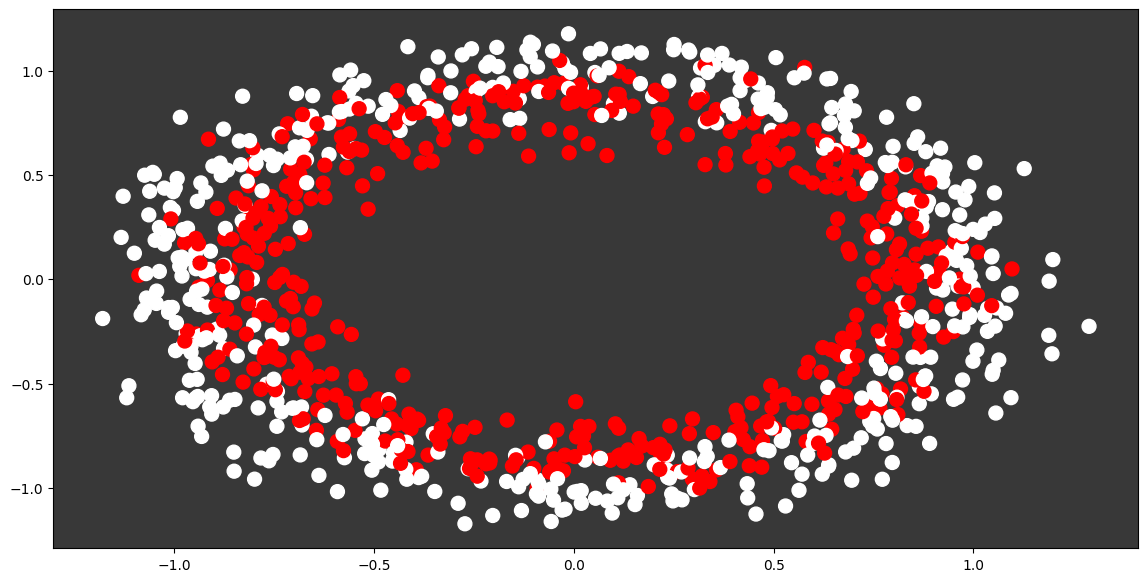

In [24]:
plt.scatter(X[:,0],X[:,1], #scatter plot을 형성한다. data point의 X,Y좌표를 나타낸다.
            c=y, s=100, #포인트의 색깔을 y가 결정한다. 포인트의 사이즈를 100으로 설정한다.
            cmap = zero_one_colourmap) #포인트의 coloring에 사용되는 cmap을 설정한다.
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, #데이터셋을 학습데이터와 테스트데이터로 나눈다.
                                                   test_size=0.33, #33%의 데이터는 테스트 데이터로 67%의 데이터는 학습 데이터셋으로 나눈다.
                                                    random_state=42) #random seed를 42로 설정한다.

In [26]:
def get_model(inp_activation): #neural network 모델을 정의한다.
  model = Sequential() #Sequential model을 사용한다.
  model.add(Dense(10,input_dim=2, activation=inp_activation)) #input dimension = 2, specified activation function
  model.add(Dense(10, activation = inp_activation)) #각 hidden layer에 10개의 node와 activation function
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(1, activation="sigmoid")) #output layer에 1개의 node, binary classification을 위해 sigmoid activation function을 사용한다.
  model.compile(loss='binary_crossentropy', #모델을 compile하기 위해 loss, optimizer, accuracy matrix를 설정한다.
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [27]:
def change_in_weight_gradient(old_weight, new_weight, learning_rate):
  gradient = (old_weight - new_weight)/ learning_rate #가중치 업데이트의 gradient를 계산한다.
  pct_change_weight = abs(100*(old_weight - new_weight)/ old_weight) #가중치의 변화의 백분율을 계산한다.
  return gradient, pct_change_weight

In [28]:
sigmoid_model = get_model("sigmoid") #sigmoid activation function 을 사용하는 neural network모델을 생성한다.
     

sigmoid_model.summary() #sigmoid 모델의 구조와 parameter에 대한 summary를 출력한다.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
sigmoid_model_first_layer_weights = sigmoid_model.get_weights()[0][0]
#sigmoid 모델의 첫번째 layer의 가중치를 지정한다.
#첫번째[0] : 리스트에서 첫번째 layer의 가중치 선택
#두번째[0] : 첫번째 layer의 실제 가중치 matrix를 선택
     

sigmoid_model_first_layer_weights

array([ 0.16959435,  0.33765572, -0.23975909, -0.52045405,  0.5644353 ,
       -0.6745136 ,  0.36036164, -0.6674142 ,  0.0135814 ,  0.3637349 ],
      dtype=float32)

In [30]:
sigmoid_history = sigmoid_model.fit(X_train, y_train, epochs = 1,
#학습과정에 대한 정보를 저장한다.
#한번의 epoch만큼 학습 데이터를 통해 모델을 학습한다.
                            validation_data = (X_test, y_test))
#학습데이터를 이용해 모델의 성능을 확인한다.

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4980 - loss: 0.6986 - val_accuracy: 0.5242 - val_loss: 0.6911


In [31]:
sigmoid_model_first_layer_weights_updated = sigmoid_model.get_weights()[0][0]
#한번의 epoch 학습 이후 가중치를 업데이트하기 위해 다시 sigmoid_model.get_weights()[0][0]를 사용하고 이를 sigmoid_model_first_layer_weights_updated에 지정한다.

In [32]:
sigmoid_model_first_layer_weights_updated

array([ 0.16959612,  0.33765444, -0.23976006, -0.5204565 ,  0.56443393,
       -0.6745136 ,  0.3603632 , -0.6674165 ,  0.01358067,  0.36373505],
      dtype=float32)

In [33]:
s_gradient, s_weight_change = change_in_weight_gradient(sigmoid_model_first_layer_weights,
                                                        sigmoid_model_first_layer_weights_updated,
                                                        #원래 가중치와 업데이트된 가중치에 대한 변화율과 gradient를 계산한다.
                                                        sigmoid_model.optimizer.get_config()["learning_rate"])
                                                        #sigmoid 모델의 optimizer에서 사용한 learning rate를 가져온다.
     

s_gradient #계산된 gradient를 저장한다.

array([-0.00177324,  0.0012815 ,  0.00096858,  0.00244379,  0.00137091,
        0.        , -0.00154972,  0.00232458,  0.00072457, -0.00014901],
      dtype=float32)

In [34]:
s_weight_change #계산된 변화율을 저장한다.

array([0.00104558, 0.00037953, 0.00040398, 0.00046955, 0.00024288,
       0.        , 0.00043005, 0.0003483 , 0.00533501, 0.00004097],
      dtype=float32)

In [35]:
#ReLU 사용
activation_model = get_model("relu") #Relu 모델을 생성한다.
     

activation_model_old_first_layer_weight = activation_model.get_weights()[0][0]
#Relu 모델의 첫번째 layer의 가중치를 지정한다.
#첫번째[0] : 리스트에서 첫번째 layer의 가중치 선택
#두번째[0] : 첫번째 layer의 실제 가중치 matrix를 선택
activation_model_old_first_layer_weight

array([ 0.5478372 ,  0.501692  , -0.6106795 , -0.65732175, -0.17793101,
       -0.27433923, -0.1784041 , -0.24512574, -0.5860305 ,  0.03666389],
      dtype=float32)

In [36]:
activation_history = activation_model.fit(X_train, y_train, epochs = 1,
                                          validation_data = (X_test, y_test))
#학습 과정에 대한 정보를 저장한다.
#한번의 epoch만큼 학습 데이터를 통해 모델을 학습한다.
#학습데이터를 이용해 모델의 성능을 확인한다.

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4966 - loss: 0.6931 - val_accuracy: 0.4758 - val_loss: 0.6932


In [37]:
activation_model_updated_first_layer_weight = activation_model.get_weights()[0][0]
#한번의 epoch 학습 이후 가중치를 업데이트하기 위해 다시 activation_model.get_weights()[0][0]를 사용하고 이를 activation_model_updated_first_layer_weight에 지정한다.

In [38]:
activation_model_updated_first_layer_weight

array([ 0.5571659 ,  0.49496606, -0.6177397 , -0.65848345, -0.18334423,
       -0.2786025 , -0.17703635, -0.2512814 , -0.57686716,  0.04047699],
      dtype=float32)

In [39]:
relu_gradient, relu_weight_change = change_in_weight_gradient(activation_model_old_first_layer_weight,
                                                              activation_model_updated_first_layer_weight,
                                                              #원래 가중치와 업데이트된 가중치에 대한 변화율과 gradient를 계산한다.
                                                              activation_model.optimizer.get_config()["learning_rate"])
                                                              #Relu 모델의 optimizer에서 사용한 learning rate를 가져온다.
     

relu_gradient #계산된 gradient를 저장한다.

array([-9.328723 ,  6.725937 ,  7.0601697,  1.1616945,  5.413219 ,
        4.263282 , -1.3677477,  6.155669 , -9.16332  , -3.813095 ],
      dtype=float32)

In [40]:
relu_weight_change #가중치 변화를 저장한다.

array([ 1.7028276,  1.3406507,  1.1561171,  0.1767315,  3.0423136,
        1.5540183,  0.7666572,  2.5112295,  1.5636252, 10.400139 ],
      dtype=float32)

In [41]:
# np stack
import numpy as np

a = np.array([[1, 3, 5], [2, 4, 6]])
b = np.array([[0, 2, 4, 6], [0, 1, 3, 5]])

np.hstack((a, b))

array([[1, 3, 5, 0, 2, 4, 6],
       [2, 4, 6, 0, 1, 3, 5]])

In [42]:
# np.vstack
a = np.array([[1, 3, 5], [2, 4, 6]])
b = np.array([[2, 4, 6], [1, 3, 5]])

np.vstack((a, b))

array([[1, 3, 5],
       [2, 4, 6],
       [2, 4, 6],
       [1, 3, 5]])

In [43]:
#np.concatenate
a = np.array([[1, 3, 5], [2, 4, 6]])
b = np.array([[2, 4, 6], [1, 3, 5]])

np.concatenate((a, b), axis=0)

array([[1, 3, 5],
       [2, 4, 6],
       [2, 4, 6],
       [1, 3, 5]])

In [44]:
a = np.array([[1, 3, 5], [2, 4, 6]])
b = np.array([[2, 4, 6], [1, 3, 5]])

np.concatenate((a, b), axis=1)

array([[1, 3, 5, 2, 4, 6],
       [2, 4, 6, 1, 3, 5]])

In [46]:
# X = np.hstack([raw_df.values[::2, :],
#         raw_df.values[1::2, :2]])
# y = raw_df.values[1::2, 2]

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

X - 'raw_df'이라는 데이터 프레임에서 값들을 추출한다. raw_df.values[::2, :]의 경우, 데이터 프레임에서 첫번째 행부터 시작하며 두칸씩 떨어진 행(홀수번째 행)들을 모든 열에 대해서 슬라이싱 한다. raw_df.values[1::2, :2]의 경우, 두번째 행부터 시작하여 두칸씩 떨어진 행(짝수번째 행)들을 두번째 열까지 슬라이싱한다. 그 다음 두 배열을 수평방향으로 합친다.

y - 'raw_df'이라는 데이터 프레임에서 값들을 추출한다. X와 마찬가지로 raw_df.values[1::2, :2]의 경우, 두번째 행부터 시작하여 두칸씩 떨어진 행들을 두번째 열까지 슬라이싱한다.

train_test_split(X, y, test_size=0.4, random_state=1) - 40%의 데이터는 테스트 데이터로 사용되고 나머지 60%의 데이터는 학습 데이터로 사용된다. random seed를 1로 고정하여 매 학습마다 data들이 똑같이 split되도록 설정한다.

# 5. Activation Function

In [48]:
## 1. Sigmoid
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Sigmoid() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [49]:
## 2. Tanh [Hyperbolic tangent]
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Tanh() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [50]:
## 3. ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [51]:
## 4. Leaky ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.LeakyReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [52]:
## Maxout
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Maxout()

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [53]:
## ELU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ELU()

	def forward(self, x):
		out = self.act(self.dense(x))
		return out
     

In [54]:
## GELU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.GELU()

	def forward(self, x):
		out = self.act(self.dense(x))
		return out